**OVERVIEW.**

This dataset explores reviews on Scotch whisky.Scotch whisky is whisky matured in Scotland for a minimum 3 years and on a minimum 40% ABV.It's mainly made up of barley,yeast and water,with manufacturers declaring their distinctions with different herbs and spices.
We will gain several insights like:
1. the relationship between:Age and ABV, price and score, ABV and score
2. comparisons between different catregories with an intent of deriving distinctions
3. and answer several interesting questions.

The dataset was sourced from the Whisky Advocate.

We start by importing all the necessary libraries we will need for analysis,visualization and then import the dataset into a DataFrame "df1" for it to load in this notebook.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("C:\\Users\\raymo\\Downloads\\Whisky\\scotch_review.csv")

We will take a quick glimpse on how the dataset looks like so that we get an idea on the cleaning that needs to be done.

In [3]:
df1.head()

,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


In [4]:
df1.tail()

,Unnamed: 0,name,category,review.point,price,currency,description
2242,2243,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125.00,$,"Its best attributes are vanilla, toasted cocon..."
2243,2244,Distillery Select 'Craiglodge' (distilled at L...,Single Malt Scotch,71,60.00,$,"Aged in a sherry cask, which adds sweet notes ..."
2244,2245,"Edradour Barolo Finish, 11 year old, 57.1%",Single Malt Scotch,70,80.00,$,"Earthy, fleshy notes with brooding grape notes..."
2245,2246,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225.00,$,"The sherry is very dominant and cloying, which..."
2246,2247,Distillery Select 'Inchmoan' (distilled at Loc...,Single Malt Scotch,63,60.00,$,"Fiery peat kiln smoke, tar, and ripe barley on..."


The "unnamed:0" column is quite unnecessary as we already have an index number for the rows.

In [5]:
df1=df1.drop('Unnamed: 0',axis=1)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          2247 non-null   object
 1   category      2247 non-null   object
 2   review.point  2247 non-null   int64 
 3   price         2247 non-null   object
 4   currency      2247 non-null   object
 5   description   2247 non-null   object
dtypes: int64(1), object(5)
memory usage: 105.5+ KB


Remove all duplicate fields as they will affect our analysis plus they are quite useless.

In [7]:
duplicate_df1 = df1[df1['name'].duplicated(keep=False)]
duplicate_df1

,name,category,review.point,price,currency,description
38,"Compass Box The Peat Monster, 46%",Blended Malt Scotch Whisky,94,60.00,$,The formula for this whisky has changed slight...
70,"Laphroaig Triple Wood, 48%",Single Malt Scotch,94,100.00,$,This is the first time I’ve been up for review...
132,"Longrow 18 year old, 46%",Single Malt Scotch,93,280.00,$,"Straw/honey color. Light to medium weight, wit..."
180,"Aberlour 18 year old, 43%",Single Malt Scotch,92,125,$,This has a significant proportion of sherry wo...
231,"Longrow 18 year old, 46%",Single Malt Scotch,92,220,$,This limited release was matured in 60% refill...
286,"Aberlour 18 year old, 43%",Single Malt Scotch,91,100.00,$,There was an Aberlour 18 on the market for a s...
303,"Bowmore, 18 year old, 43%",Single Malt Scotch,91,85.00,$,This replaces the 17 year old in the standard ...
321,"Glen Scotia 18 year old, 46%",Single Malt Scotch,91,113,$,"New for 2017, this was matured for 17 years in..."
352,"Bowmore, 18 year old, 43%",Single Malt Scotch,91,85.00,$,This replaces the 17 year old in the standard ...
385,"Compass Box Oak Cross, 43%",Blended Malt Scotch Whisky,90,59,$,"Compared to Asyla, this has noticeable added r..."


In [8]:
df1 = df1.drop_duplicates(subset='name')
df1

,name,category,review.point,price,currency,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."
...,...,...,...,...,...,...
2242,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125.00,$,"Its best attributes are vanilla, toasted cocon..."
2243,Distillery Select 'Craiglodge' (distilled at L...,Single Malt Scotch,71,60.00,$,"Aged in a sherry cask, which adds sweet notes ..."
2244,"Edradour Barolo Finish, 11 year old, 57.1%",Single Malt Scotch,70,80.00,$,"Earthy, fleshy notes with brooding grape notes..."
2245,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225.00,$,"The sherry is very dominant and cloying, which..."


"review.point" is quite a confusing name so we rename the column with a more "analytical" name,"score".

In [9]:
df1.rename({'review.point':'score'},axis=1,inplace=True)


The ".shape" method shows us how many fields and records do we have.We have 6 and 2223 respectively.

In [10]:
df1.shape

(2223, 6)

Any record with  a score 'zero'/0 won't be of help to us as we can't perform any analysis on it(since no one took the time to review it),thus we look for such records and drop them.

In [11]:
df1[(df1['score']==0)]

,name,category,score,price,currency,description


In [12]:
df1=df1[~(df1['score']==0)]

In [13]:
df1.head()

,name,category,score,price,currency,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


Price values should be numeric, thus we will attempt to get all the values that aren't,below.

In [14]:
symbol_idx = pd.to_numeric(df1['price'], errors = 'coerce').isnull() # errors = 'coerce' results in NaNs for non-numeric values
df1[symbol_idx][['name','price']].head()

,name,price
19,"Balvenie 1973 43 year old, 46.6%","$15,000 or $60,000/set"
49,"Bowmore 1966 50 year old, 41.5%","30,000"
95,"Balvenie 1961 55 year old, 41.7%","60,000/set"
100,Brora 34 year old (Diageo Special Releases 201...,"1,700"
102,"Bruichladdich 1984, 43.7%","1,100"


The records above have data type 'strings' for prices and that makes it difficult to organize and analyze the  data.Since $15000 is equal to 60000/set(check record 19),we will force the prices to read so.

In [15]:
df1.loc[[19,95,410,1000,1215],'price']=15000
df1['price'].replace('/liter', '', inplace = True, regex = True) #get rid of /liter as the bottle is actually 1 liter
df1['price'].replace(',', '', inplace = True, regex = True) #get reid of the commas seprating zeros as they make our numerals a string
df1['price'] = df1['price'].astype('float') #we now convert all the numerals into data type float as its more pleasing to work with.




Confirm all the prices are type floats now.

In [16]:

df1.head(10)

,name,category,score,price,currency,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0,$,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.0,$,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.0,$,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325.0,$,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160.0,$,"Captivating, enticing, and wonderfully charmin..."
5,"Ardbeg Corryvreckan, 57.1%",Single Malt Scotch,96,85.0,$,"Powerful, muscular, well-textured, and invigor..."
6,"Gold Bowmore, 1964 vintage, 42.4%",Single Malt Scotch,96,6250.0,$,Deep gold color. Surprisingly lively on the no...
7,"Bowmore, 40 year old, 44.8%",Single Malt Scotch,96,11000.0,$,"Definitely showing its age, but not in a bad w..."
8,"The Dalmore, 50 year old, 52.8%",Single Malt Scotch,96,1500.0,$,The Dalmore is one of a handful of whiskies th...
9,"Glenfarclas Family Casks 1954 Cask #1260, 47.2%",Single Malt Scotch,96,3360.0,$,A rich amber color and elegantly oxidized note...


We now delete the currency field as it doesn't offer any significant meaning since all the bottles share the same currency,"$".
We can confirm that below

In [17]:
df1['currency'].value_counts()

$    2223
Name: currency, dtype: int64

In [18]:
df1.drop('currency',axis=1,inplace=True)

In [19]:
df1.head(2)

,name,category,score,price,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.0,What impresses me most is how this whisky evol...


In [20]:
df_copy=df1.copy()#saving the work this far incase we alter or loose it.
df1_checkpoint=df1.copy()

With that done,let's begin the comparisons.We will start with price to score points ratio.This is an imporatnt analysis that will help:
Understand how customers perceive the brands,
Will help in pricing stratergy in that manufacturers will consider the quality to price ratio in setting prices,
The ratio is a standardized measure for experts to compare whiskies based on their prices and scores,
The ratio will help understand if a whisky is overpriced,it's quality over estimated or if the score is inaccurate.
A low ratio e.g., 2.0 may suggest the price is affordable for the quality offered,and a high ratio e.g.,146.0 suggests an oveprice for such quality due to reasons like effective marketing, niche markets, limited editions, rare ingredients, aging periods, high demand low supply e.t.c.


In [21]:
df1['price_score_ratio']=round(df1['price']/df1['score'],2)


In [22]:
df1.head(4)

,name,category,score,price,description,price_score_ratio
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0,"Magnificently powerful and intense. Caramels, ...",2.32
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.0,What impresses me most is how this whisky evol...,46.39
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.0,There have been some legendary Bowmores from t...,139.18
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325.0,With a name inspired by a 1926 Buster Keaton m...,3.39


We want to extract useful attributes from the 'name' column like Age of whisky and it's ABV.E.g.,To extract the age we will extract the numeric values that come before the word 'year' as its uniform.

In [23]:
df1['age'] = df1['name'].str.extract(r'(\d+) year')[0].astype(float)
df1['name'] = df1['name'].str.replace(' ABV ', '')
df1['alcohol%'] = df1['name'].str.extract(r"([\(\,\,\'\"\’\”\$] ? ?\d+(\.\d+)?%)")[0]
df1['alcohol%'] = df1['alcohol%'].str.replace("[^\d\.]", "").astype(float)
df1[['name', 'age', 'alcohol%']].sample(7)


C:\Users\raymo\AppData\Local\Temp\ipykernel_7304\2186485897.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['alcohol%'] = df1['alcohol%'].str.replace("[^\d\.]", "").astype(float)


,name,age,alcohol%
490,"Loch Lomond 18 year old, 46%",18.0,46.0
1428,"Auchentoshan Springwood, 40%",NaN,40.0
1444,Douglas Laing Provenance (distilled at Blair A...,12.0,46.0
1605,"Bruichladdich Octomore 7.2, 58.5%",NaN,58.5
1728,Wemyss Malts Banquet of Fruits 1994 (distilled...,NaN,46.0
1749,Cadenhead’s (distilled at Braes of Glenlivet) ...,16.0,56.9
1956,"Gordon & MacPhail (distilled at Glenlossie), 2...",27.0,NaN


Values with NaN(Not a Number) mean there was no age information in their names.

It's important you check the numerical attributes of your data after cleaning,so that you can get an idea of how the dataset looks like.These attributes include:mean,median(denoted as 50%),max and min.
Let's do it.

In [24]:
df1.describe()

,score,price,price_score_ratio,age,alcohol%
count,2223.000000,2223.000000,2223.000000,1197.000000,2206.000000
mean,86.708502,568.069276,6.296541,21.004177,47.925335
std,4.051819,4046.391806,43.687557,10.067456,5.876252
min,63.000000,12.000000,0.150000,3.000000,40.000000
25%,84.000000,70.000000,0.810000,13.000000,43.000000
50%,87.000000,110.000000,1.280000,18.000000,46.000000
75%,90.000000,200.500000,2.355000,26.000000,52.200000
max,97.000000,157000.000000,1688.170000,70.000000,67.400000


We can safely say the mean price of whiskies in our dataset is $568, the median price is $110, the most expensive wine costs a whole $157000!, 
the cheapest bottle costs $12, the standard deviation of the prices from the mean is $4046!, the oldest wine has been aged for a cool 70 years!, the youngest is 3 years and so on.The describe() method is very handy in enlightening us on what we have.

Business wise,we can deduce that, a whisky must be aged for three years minimum,the median ABV appreciated by customers is 46% and it's also important to note the minimum ABV allowed by regulators is 40% for a whisky.
The median price_score_ratio is 1.28 which suggests customers appreciate affordable good quality whisky.
We would also suggest to distillers that a price point below $110 will be very much appreciated in the market.Also there is an interesting deduction that customers appreciate 18 year old whiskies,and by law a whisky must be aged for a minimum of 3 years.
We use the median as it takes care of the outliers.Outliers affect the mean so we rarely use the mean.

In [25]:
df1['category'].value_counts()

Single Malt Scotch            1798
Blended Scotch Whisky          209
Blended Malt Scotch Whisky     131
Single Grain Whisky             57
Grain Scotch Whisky             28
Name: category, dtype: int64

We are going to use My Sql to analyse categorical data as its more powerful and intuitive.Neverthless,we do see above that single malt whiskies are the most common with grain scotch being rare.

In [26]:
df1.sort_values(by='price',ascending=False).head(10)

,name,category,score,price,description,price_score_ratio,age,alcohol%
85,"Diamond Jubilee by John Walker & Sons, 42.5%",Blended Scotch Whisky,93,157000.0,Bright gold. Amazingly fresh fruits and quince...,1688.17,NaN,42.5
109,"Dalmore 50 year old, 40%",Single Malt Scotch,93,60000.0,This veteran Dalmore was matured successively ...,645.16,50.0,40.0
49,"Bowmore 1966 50 year old, 41.5%",Single Malt Scotch,94,30000.0,The third and most exclusive release in Bowmor...,319.15,50.0,41.5
409,Balvenie DCS Compendium 1st Chapter 1968 46 ye...,Single Malt Scotch,90,27620.0,The oldest of the set shows a shift into a sen...,306.89,46.0,45.9
20,"Bowmore 50 year old (distilled 1961), 40.7%",Single Malt Scotch,95,26650.0,"The whisky is sensational, a glorious mix of g...",280.53,50.0,40.7
316,"The Dalmore 1969 aged 42 years, 45.5%",Single Malt Scotch,91,24000.0,"Initially filled into an ex-bourbon cask, then...",263.74,42.0,45.5
356,"Tullibardine 1952, 40.2%",Single Malt Scotch,91,23427.0,This bottling is from the oldest cask owned by...,257.44,NaN,40.2
469,Gordon & MacPhail Generations: The Glenlivet 7...,Single Malt Scotch,90,21000.0,You would expect any 70 year old whisky to be ...,233.33,70.0,45.9
44,"Ardbeg, 1974 Vintage, Cask #3524, 49.9%",Single Malt Scotch,94,20000.0,"Cask #3524 is darker, with notes of sticky tof...",212.77,NaN,49.9
17,"Ardbeg, 1974 Vintage, Cask #3145, 49.9%",Single Malt Scotch,95,20000.0,"Cask #3145 is the lighter in color, and the sw...",210.53,NaN,49.9


Intrestingly, the most expensive whisky was made by Johnie Walker & Sons,to celebrate 60 years on the throne by Queen Elizabeth II.
This is a reasonable claim for it's high price as it's a limited edition for a rare occurence.Safe to say limited edition whiskies may cost more than the other lot.Another interesting insight is that Bowmore and Ardbeg have two whiskies each that are among the most exprensive.We might ask why.

In [27]:
df1.sort_values(by='score',ascending=False).head()

,name,category,score,price,description,price_score_ratio,age,alcohol%
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0,"Magnificently powerful and intense. Caramels, ...",2.32,NaN,40.0
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.0,There have been some legendary Bowmores from t...,139.18,46.0,42.9
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.0,What impresses me most is how this whisky evol...,46.39,42.0,40.5
8,"The Dalmore, 50 year old, 52.8%",Single Malt Scotch,96,1500.0,The Dalmore is one of a handful of whiskies th...,15.62,50.0,52.8
11,"Macallan 1976 Vintage, 29 year old, cask #1135...",Single Malt Scotch,96,1500.0,Classic sherry cask-aged Macallan. Antique amb...,15.62,29.0,45.4


Johnie Walker Blue Label is the most reviewed whisky.

In [28]:
df1.sort_values(by='price_score_ratio',ascending=True).head()

,name,category,score,price,description,price_score_ratio,age,alcohol%
970,"Carlyle, 40%",Single Malt Scotch,88,13.0,This noble Scot consists of a blend of 20 diff...,0.15,NaN,40.0
2074,"Monarch of the Glen, 40%",Blended Scotch Whisky,81,12.0,"Aromas of liquid honey, light toffee, dried ap...",0.15,NaN,40.0
2167,"MacQueen’s 3 year old, 40%",Blended Scotch Whisky,80,13.0,MacQueen’s has an impressive range of age stat...,0.16,3.0,40.0
2073,"Sir Edward’s Blended Whisky, 40%",Blended Scotch Whisky,81,14.0,From the perfumed nose to the sweet and short ...,0.17,NaN,40.0
2227,"Clansman, 40%",Blended Scotch Whisky,77,14.0,"This Highland blend has a nose of lemon peel, ...",0.18,NaN,40.0


Above is an insight on whiskies that will give the most value for your money,remember a low price_score_ratio suggests great quality at an affordable price.

Say,a customer has $50 and wants to taste a whisky that is highly regarded, how would we help him/her?
Let's see:

In [29]:
df1[(df1['price']<50) & (df1['score']>89)].sort_values(by='price',ascending=True).head()

,name,category,score,price,description,price_score_ratio,age,alcohol%
391,Johnnie Walker Blenders’ Batch No. 3 Triple Gr...,Blended Scotch Whisky,90,30.0,"Wheat, corn, and malted barley are your three ...",0.33,10.0,41.3
519,"Cutty Sark Prohibition, 50%",Blended Scotch Whisky,90,30.0,The Real McCoy! It's said that during Prohibit...,0.33,NaN,50.0
87,"Black Bottle, 10 year old, 43%",Blended Scotch Whisky,93,34.0,Black Bottle is unique in that it combines sev...,0.37,10.0,43.0
569,"Shackleton, 40%",Blended Malt Scotch Whisky,90,35.0,One hundred ten years after the Nimrod expedit...,0.39,NaN,40.0
467,"The Glenlivet French Oak, 12 year old, 40%",Single Malt Scotch,90,36.0,Antique amber color. This whisky maintains the...,0.40,12.0,40.0


Are you a whisky connoisseur interested in tasting the oldest wine in the dataset?Alright!

In [30]:
df1.sort_values(by='age',ascending=False).head()

,name,category,score,price,description,price_score_ratio,age,alcohol%
469,Gordon & MacPhail Generations: The Glenlivet 7...,Single Malt Scotch,90,21000.0,You would expect any 70 year old whisky to be ...,233.33,70.0,45.9
200,Gordon & MacPhail (distilled at Glen Grant) 60...,Single Malt Scotch,92,12000.0,Rich gold. Superb mature nose with subtle whis...,130.43,60.0,42.3
2236,"The Macallan Lalique Decanter, 55 year old, 40.1%",Single Malt Scotch,74,12000.0,"Deep, thick nose, with sappy oak, dried citrus...",162.16,55.0,40.1
95,"Balvenie 1961 55 year old, 41.7%",Single Malt Scotch,93,15000.0,Aged in a European oak oloroso sherry hogshead...,161.29,55.0,41.7
555,Port Dundas 52 year old (Diageo Special Releas...,Single Grain Whisky,90,900.0,This 1964 distillate has a nose of rich toffee...,10.00,52.0,44.6


Are you again interested in the most alcoholic whisky?

In [31]:
df1.sort_values(by='alcohol%',ascending=False).head()

,name,category,score,price,description,price_score_ratio,age,alcohol%
2011,"Adelphi (distilled at Glenrothes) 7 year old, ...",Single Malt Scotch,82,135.0,Massive with a huge sherried attack; seven yea...,1.65,7.0,67.4
1560,Wemyss Malts Fruit Bonbons (distilled at Glen ...,Single Malt Scotch,85,137.0,One of four Spring 2013 single cask releases f...,1.61,NaN,66.0
817,"Caol Ila 'Unpeated Style,' 10 year old (2009 R...",Single Malt Scotch,88,60.0,"Caol Ila makes unpeated whisky for blenders, b...",0.68,10.0,65.8
1720,Single Malts of Scotland (distilled at Tormore...,Single Malt Scotch,84,150.0,There’s something rather round peg in a square...,1.79,NaN,64.2
1453,"Octomore Islay Barley 2009, 64%",Single Malt Scotch,85,239.0,An interesting nose that’s somewhat akin to a ...,2.81,NaN,64.0


As we said earlier the median is a good measure of tendency as it's not affected by outliers.In our case the Diamond Jubilee whisky price at a cost of $157,000 will heavily affect the mean.
Here is how we find the median.

In [32]:
category_median_prices = df1.groupby('category')['price'].median().reset_index()
category_median_prices.rename(columns={'price': 'median_price'}, inplace=True)
category_median_prices

,category,median_price
0,Blended Malt Scotch Whisky,70.0
1,Blended Scotch Whisky,68.0
2,Grain Scotch Whisky,125.0
3,Single Grain Whisky,124.0
4,Single Malt Scotch,116.0


We will plot a graph to visualize this:

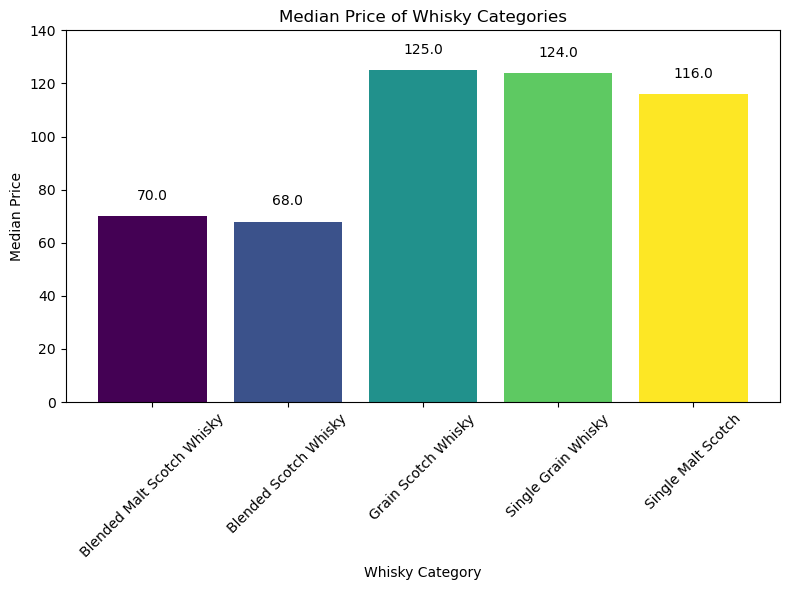

In [33]:
categories = ['Blended Malt Scotch Whisky', 'Blended Scotch Whisky', 'Grain Scotch Whisky', 'Single Grain Whisky', 'Single Malt Scotch']
median_prices = [70.0, 68.0, 125.0, 124.0, 116.0]
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, median_prices,color=plt.cm.viridis(np.linspace(0, 1, len(categories))))
plt.xlabel('Whisky Category')
plt.ylabel('Median Price')
plt.title('Median Price of Whisky Categories')
plt.xticks(rotation=45)
plt.ylim(0, 140)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, round(bar.get_height(), 2), ha='center', va='bottom')
plt.tight_layout()
plt.show()

The visual tells us Grain Scotch Whisky is the most expensive whisky followed by Single Grain Whisky.

Let's investigate the median and mean ageing periods to see if we can support a hypothesis that ageing periods affect the price

In [34]:
category_median_age=df1.groupby('category')['age'].median().reset_index()
category_median_age.rename(columns={'age':'median_age'},inplace=True)
category_median_age

,category,median_age
0,Blended Malt Scotch Whisky,18.0
1,Blended Scotch Whisky,18.0
2,Grain Scotch Whisky,32.0
3,Single Grain Whisky,26.5
4,Single Malt Scotch,18.0


WOW! What a great insight! Grain scotch whisky has the longest ageing period which could be a reasonable contributing factor to its's high price.Geneally, the longer the ageing the more the flavours get complex.

In [36]:
category_mean_age=round(df1.groupby('category')['age'].mean().reset_index(),2)
category_mean_age.rename(columns={'age':'mean_age'},inplace=True)
category_mean_age

,category,mean_age
0,Blended Malt Scotch Whisky,18.90
1,Blended Scotch Whisky,20.36
2,Grain Scotch Whisky,32.22
3,Single Grain Whisky,29.23
4,Single Malt Scotch,20.54


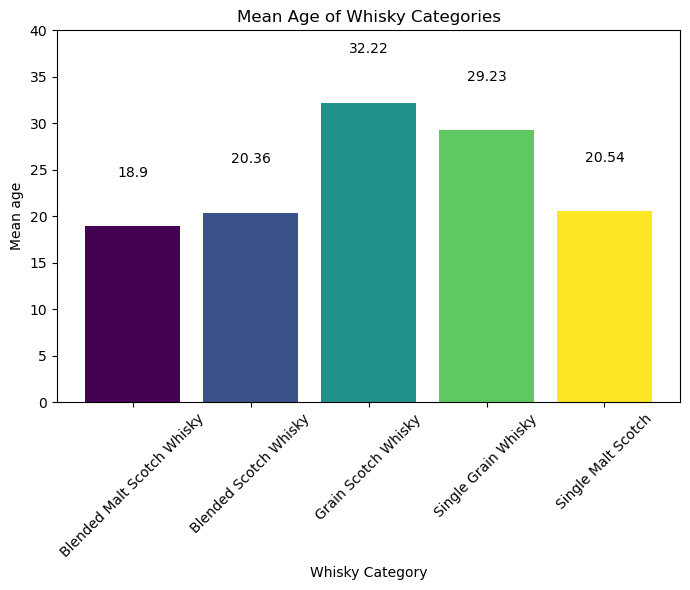

In [50]:
categories = ['Blended Malt Scotch Whisky', 'Blended Scotch Whisky', 'Grain Scotch Whisky', 'Single Grain Whisky', 'Single Malt Scotch']
mean_age = [18.90, 20.36, 32.22, 29.23, 20.54]
plt.figure(figsize=(7, 6))
bars = plt.bar(categories, mean_age,color=plt.cm.viridis(np.linspace(0, 1, len(categories))))
plt.xlabel('Whisky Category')
plt.ylabel('Mean age')
plt.title('Mean Age of Whisky Categories')
plt.xticks(rotation=45)
plt.ylim(0, 40)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, round(bar.get_height(), 2), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Great!, the mean confirms that grain scotch whisky is aged more than other whiskies.A factor we closely link to it's high prices.

In [42]:
mean_abv_per_category=df1.groupby('category')['alcohol%'].mean()
mean_abv_category = mean_abv_per_category.reset_index()
mean_abv_category.columns = ['category', 'mean_alcohol%']
mean_abv_category['mean_alcohol%'] = mean_abv_category['mean_alcohol%'].round(2)
mean_abv_category

,category,mean_alcohol%
0,Blended Malt Scotch Whisky,46.72
1,Blended Scotch Whisky,42.89
2,Grain Scotch Whisky,49.86
3,Single Grain Whisky,50.68
4,Single Malt Scotch,48.49


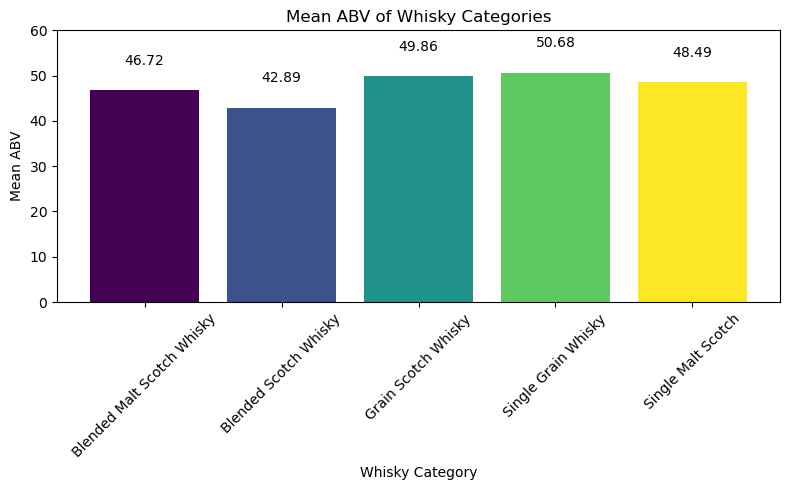

In [49]:
categories = ['Blended Malt Scotch Whisky', 'Blended Scotch Whisky', 'Grain Scotch Whisky', 'Single Grain Whisky', 'Single Malt Scotch']
mean_alcohol = [46.72, 42.89, 49.86, 50.68, 48.49]
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, mean_alcohol,color=plt.cm.viridis(np.linspace(0, 1, len(categories))))
plt.xlabel('Whisky Category')
plt.ylabel('Mean ABV')
plt.title('Mean ABV of Whisky Categories')
plt.xticks(rotation=45)
plt.ylim(0, 60)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, round(bar.get_height(), 2), ha='center', va='bottom')
plt.tight_layout()
plt.show()

From the visualization,we can deduct that the two 'grain' whiskies have a higher ABV than others.

It's important we investigate if there is a correleation between age and price.Does a certain ageing result to high costs of production?

In [35]:
df1['age'].corr(df1['price'])

0.3884663691923606

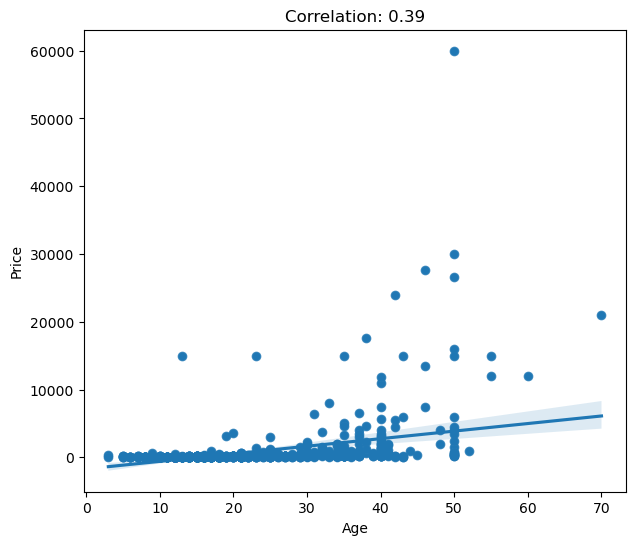

In [39]:
correlation = df1['age'].corr(df1['price'])
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df1, x='age', y='price')
sns.regplot(data=df1, x='age', y='price')
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

We can see that there are several outliers but a correlation is much evident.
0.38846 is a positive correlation.Though not a strong one,it suggests the prices usually tends to go high as ageing increments.
But since it's not very strong,we should consider other factors like brand as well.Generally, we can say the two tend to move together.

Would age and ABV be correlated?

In [72]:
df1['age'].corr(df1['alcohol%'])

-0.039866486507332446

There is almost 0 correlation  between the two.

A distiller would also be interested in knowing what is the mean ABV for each category that he might intend to start producing.

Having derived that, we would be interested in knowing what are the mean scores for different categories.

In [41]:
categories_mean_score=df1.groupby('category')['score'].mean().reset_index().round(2)
categories_mean_score.rename(columns={'score':'mean_score'},inplace=True)
categories_mean_score

,category,mean_score
0,Blended Malt Scotch Whisky,87.70
1,Blended Scotch Whisky,87.24
2,Grain Scotch Whisky,86.50
3,Single Grain Whisky,85.51
4,Single Malt Scotch,86.62


Are prices and scores related? A 0.128 correlation is positive but very weak,we can say they go together but with the inclusion of other factors.

In [84]:
df1['price'].corr(df1['score'])

0.12852290995707752

**In conclusion**,business wise, we can say that the ageing period is positively correlated with the price,that's why grain scotch whisky is more expensive.
The 'grain' whiskies tend to have more ABV than the rest as well.

Neverthless, people loved Blended Malt and Blended Scotch Whiskies more than others.They are also the most affordable amongst the lot.
Therefore, we could safely advise a new distiller that Blended Malt and Blended Scotch Whiskies are more favourable categories to start producing as they have an affordable price range, shorter ageing period and were most loved by the tasters.